In [1]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf

In [2]:
import tensorflow.keras.backend as K

In [3]:
from tensorflow.keras.models import Model

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras.layers import Input

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
from tensorflow.keras.layers import Flatten

In [8]:
from tensorflow.keras.layers import Conv2D

In [9]:
from tensorflow.keras.layers import MaxPooling2D

In [10]:
from tensorflow.keras.layers import Dropout

In [11]:
from tensorflow.keras.layers import LeakyReLU

In [12]:
from tensorflow.keras.layers import Activation

In [13]:
from tensorflow.keras.optimizers import Adam

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(200,200,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(200*200*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(4))
model.add(Activation('softmax'))
model.summary()

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 48, 48, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 384)       332160    
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 384)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 256)       884992    
_________________________________________________________________
activation_2 (Activation)    (None, 20, 20, 256)       0

In [20]:
train_datagen=ImageDataGenerator(rescale=1./128,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./128)

In [21]:
training_set=train_datagen.flow_from_directory('Dataset/train',target_size=(200,200),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('Dataset/test',target_size=(200,200),batch_size=32,class_mode='categorical')

Found 1125 images belonging to 4 classes.
Found 335 images belonging to 4 classes.


In [22]:
img_dims = 150
epochs = 20
batch_size = 32

In [23]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/20
35/35 [==============================] - 86s 2s/step - loss: 1.3889 - accuracy: 0.2708 - val_loss: 1.3675 - val_accuracy: 0.3594
Epoch 2/20
35/35 [==============================] - 73s 2s/step - loss: 1.3755 - accuracy: 0.3248 - val_loss: 1.3569 - val_accuracy: 0.4531
Epoch 3/20
35/35 [==============================] - 72s 2s/step - loss: 1.3523 - accuracy: 0.3934 - val_loss: 1.3461 - val_accuracy: 0.4625
Epoch 4/20
35/35 [==============================] - 75s 2s/step - loss: 1.3394 - accuracy: 0.4304 - val_loss: 1.3335 - val_accuracy: 0.4844
Epoch 5/20
35/35 [==============================] - 71s 2s/step - loss: 1.3254 - accuracy: 0.4565 - val_loss: 1.3120 - val_accuracy: 0.5281
Epoch 6/20
35/35 [==============================] - 73s 2s/step - loss: 1.3074 - accuracy: 0.4803 - val_loss: 1.3011 - val_accuracy: 0.5437
Epoch 7/20
35/35 [==============================] - 71s 2s/step - loss: 1.2893 - accuracy: 0.5114 - val_loss: 1.2808 - val_accuracy: 0.5906
Epoch 8/20
35/35 [==

In [24]:
import matplotlib.pyplot as plt

In [25]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

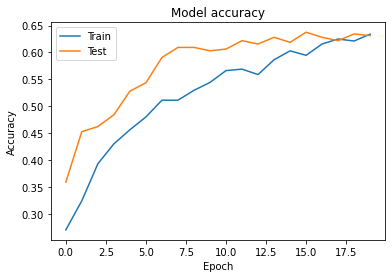

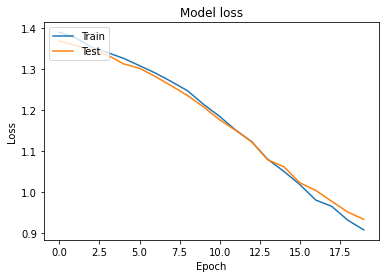

In [26]:
graph()

In [27]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
11/11 [==============================] - 5s 435ms/step - loss: 0.9341 - accuracy: 0.6328
Test Accuracy: 63.28358054161072
